In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def find_closest_centroid(X,centroids):
    k=centroids.shape[0]
    idx=np.zeros(X.shape[0],dtype=int)
    for i in range(X.shape[0]):
        distance=[]
        for j in range(centroids.shape[0]):
            normi_j=np.linalg.norm(X[i]-centroids[j])
            distance.append(normi_j)
        idx[i]=np.argmin(distance)
    return idx

In [22]:
def compute_centroids(X,idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    for k in range(K):
        points=X[idx==k]
        centroids[k]=np.mean(points,axis=0)
    return centroids

In [23]:
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    plot_data_points(X, idx)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    plt.title("Iteration number %d" %i)

In [24]:
def run_kmeans(X,initial_centroids,max_iters=10,plot_progress=False):
    m,n=X.shape
    K=initial_centroids.shape[0]
    centroids=initial_centroids
    previous_centroids=centroids
    idx=np.zeros(m)
    plt.figure(figsize=(8,6))
    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx=find_closest_centroid(X,centroids)
        if plot_progress:
            plot_progress_kMeans(X,centroids,previous_centroids,idx,K,i)
            previous_centroids=centroids
        centroids=compute_centroids(X,idx,K)
    plt.show()
    return centroids,idx

In [25]:
def kmeans_init_centroids(X,k):
    randidx=np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [26]:
original_img=plt.imread('bird_small.png')

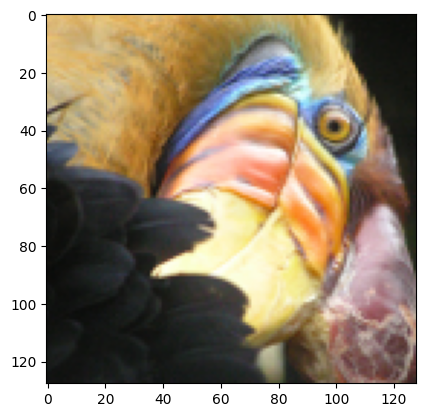

In [27]:
plt.imshow(original_img)

In [28]:
print(original_img.shape)

(128, 128, 3)


In [29]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [30]:
K = 16
max_iters = 10
initial_centroids = kmeans_init_centroids(X_img, K)
centroids, idx = run_kmeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [31]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [6 0 0 0 6]


In [33]:
idx = find_closest_centroid(X_img, centroids)
X_recovered = centroids[idx, :] 
X_recovered = np.reshape(X_recovered, original_img.shape)

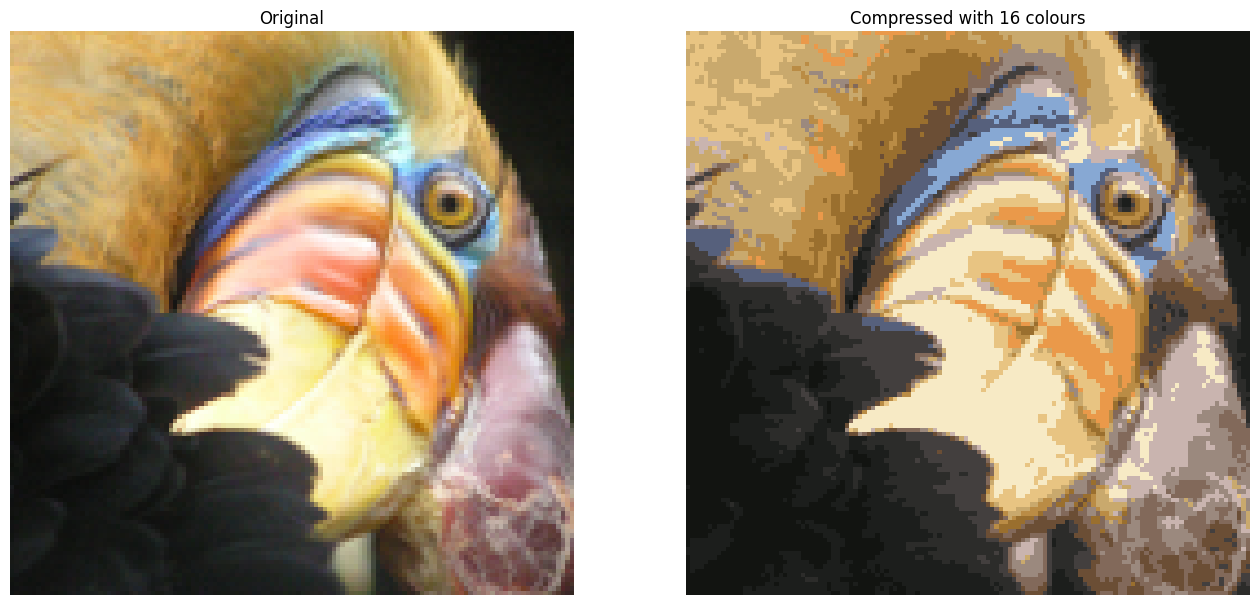

In [35]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()